In [542]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from scipy import stats
import datetime as dt
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense,LSTM

### Activity 10
### 63010026 กฤตศยา นทีมณฑล
### 63010062 กันต์กนิษฐ์ ทองเก๋ง
### 63010339 ณัฐวดี ติณภูมิ

## (a) Load and Prepare Data

In [543]:
ACC = pd.read_csv("../ML/dataset/46343_acceleration.txt", sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv("../ML/dataset/46343_heartrate.txt", sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv("../ML/dataset/46343_labeled_sleep.txt", sep = ' ',names=['timedelta', 'sleep'])

In [544]:
ACC

,timedelta,accX,accY,accZ
0,-124489.161050,0.017487,-0.586700,-0.805771
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
...,...,...,...,...
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284
981998,17643.026865,0.505737,0.427673,-0.749741


In [545]:
HeartR

,timedelta,heartrate
0,-556410.36066,57
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
...,...,...
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75
4876,16975.47229,76


In [546]:
SleepL

,timedelta,sleep
0,0,-1
1,30,-1
2,60,-1
3,90,-1
4,120,-1
...,...,...
562,16860,0
563,16890,0
564,16920,0
565,16950,0


In [547]:
# Check ''timedelta' max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()
HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()
SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()
print("ACC start:",ACC_min_date,"ACC end:",ACC_max_date)
print("HeartR start:",HeartR_min_date,"HeartR end:",HeartR_max_date)
print("SleepL start:",SleepL_min_date,"SleepL end:",SleepL_max_date)

ACC start: -124489.16105 ACC end: 17643.046417
HeartR start: -556410.36066 HeartR end: 16980.47229
SleepL start: 0 SleepL end: 16980


In [548]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# ACC_new = ACC[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
ACC_new = ACC[(ACC['timedelta'] > ACC_min_date)&(ACC['timedelta'] < ACC_max_date)]
ACC_new

,timedelta,accX,accY,accZ
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
5,-124489.078316,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,17642.946943,0.506226,0.428665,-0.748779
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284


In [549]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# HeartR_new = HeartR[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
HeartR_new = HeartR[(HeartR['timedelta'] > HeartR_min_date)&(HeartR['timedelta'] < HeartR_max_date)]
HeartR_new

,timedelta,heartrate
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
5,-556163.88076,61
...,...,...
4872,16954.47226,73
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75


In [550]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# SleepL_new = SleepL[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
SleepL_new =SleepL[(SleepL['timedelta'] > SleepL_min_date)&(SleepL['timedelta'] <SleepL_max_date)]
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
561,16830,0
562,16860,0
563,16890,0
564,16920,0


## Load and Prepare Data (ACC)

In [551]:
# ------------ Rounding ACC (Rounding to 1 sec) -------------------------------#  
# # Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))
ACC_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_17320\3782895249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))


,timedelta,accX,accY,accZ
1,-2 days +13:25:11,0.018982,-0.589676,-0.809158
2,-2 days +13:25:11,0.020966,-0.580887,-0.815048
3,-2 days +13:25:11,0.019485,-0.580872,-0.813583
4,-2 days +13:25:11,0.016998,-0.587204,-0.806259
5,-2 days +13:25:11,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,0 days 04:54:03,0.506226,0.428665,-0.748779
981995,0 days 04:54:03,0.505249,0.425720,-0.748764
981996,0 days 04:54:03,0.508194,0.429138,-0.750717
981997,0 days 04:54:03,0.508179,0.427200,-0.747284


In [552]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean()

In [553]:
# acc_X, acc_Y, acc_Z
ACC_new2 = pd.concat([df_acc_X, df_acc_Y, df_acc_Z], axis=1).reset_index()
ACC_new2

,timedelta,accX,accY,accZ
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241
...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636
19589,0 days 04:54:00,0.502466,0.428149,-0.750749
19590,0 days 04:54:01,0.502944,0.428004,-0.750483
19591,0 days 04:54:02,0.506228,0.428170,-0.748264


In [554]:
# ACC_new2['timedelta'] = ACC_new2['timedelta'] - ACC_new2['timedelta'].min()
# ACC_new2

## Load and Prepare Data (Heart Rate)

In [555]:
# ------------ Rounding Heart Rate (Rounding to 1 sec) -------------------------------
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))
# HeartR_new['timedelta'] = HeartR_new['timedelta'] - HeartR_new['timedelta'].min()
HeartR_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_17320\786107525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))


,timedelta,heartrate
1,-7 days +13:26:32,56
2,-7 days +13:26:37,56
3,-7 days +13:26:41,57
4,-7 days +13:26:51,59
5,-7 days +13:30:36,61
...,...,...
4872,0 days 04:42:34,73
4873,0 days 04:42:39,72
4874,0 days 04:42:44,74
4875,0 days 04:42:50,75


In [556]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()
HeartR_new2

,heartrate
timedelta,
-7 days +13:26:32,56.0
-7 days +13:26:33,56.0
-7 days +13:26:34,56.0
-7 days +13:26:35,56.0
-7 days +13:26:36,56.0
...,...
0 days 04:42:51,75.0
0 days 04:42:52,75.0
0 days 04:42:53,75.0


## Load and Prepare Data (Sleep Label)

In [557]:
# ------------ Rounding Sleep Label (Rounding to 1 sec) -------------------------------
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))
# SleepL_new['timedelta'] = SleepL_new['timedelta'] - SleepL_new['timedelta'].min()
SleepL_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_17320\3998733642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))


,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
561,0 days 04:40:30,0
562,0 days 04:41:00,0
563,0 days 04:41:30,0
564,0 days 04:42:00,0


In [558]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:42:26,0.0
0 days 04:42:27,0.0
0 days 04:42:28,0.0


## Merge Data and Standardized data

In [559]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(ACC_new2, HeartR_new2, on='timedelta')
df = pd.merge_asof(df, SleepL_new2, on = 'timedelta')
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [560]:
#Fill NA
#Heart rate
df['heartrate'].fillna(df['heartrate'].median(),inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [561]:
#Fill NA
#Sleep Label
df['sleep'].fillna(0,inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,0.0
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,0.0
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,0.0
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,0.0
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [562]:
#Drop Column
df.drop(columns='timedelta')

,accX,accY,accZ,heartrate,sleep
0,0.016081,-0.585817,-0.811041,86.0,0.0
1,0.038944,-0.578258,-0.818431,86.0,0.0
2,0.022542,-0.567728,-0.825828,86.0,0.0
3,0.017970,-0.570523,-0.821320,86.0,0.0
4,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...
19588,0.504763,0.430875,-0.747636,76.0,0.0
19589,0.502466,0.428149,-0.750749,76.0,0.0
19590,0.502944,0.428004,-0.750483,76.0,0.0
19591,0.506228,0.428170,-0.748264,76.0,0.0


In [563]:
# Standardized data
scaler = preprocessing.StandardScaler()
feature_columns = df[['accX', 'accY', 'accZ', 'heartrate']]
label_columns = df[['sleep']]
df_feature = pd.DataFrame(scaler.fit_transform(feature_columns.values),index = feature_columns.index,columns=feature_columns.columns)
df_feature

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.124300,-1.251807,-0.739550,0.684847
2,0.083422,-1.223095,-0.748830,0.684847
3,0.072028,-1.230717,-0.743175,0.684847
4,0.123492,-1.218226,-0.750602,0.684847
...,...,...,...,...
19588,1.285227,1.499704,-0.650738,-0.652200
19589,1.279502,1.492272,-0.654644,-0.652200
19590,1.280695,1.491878,-0.654310,-0.652200
19591,1.288878,1.492329,-0.651526,-0.652200


In [564]:
df_label = label_columns
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19588,0.0
19589,0.0
19590,0.0
19591,0.0


In [565]:
df_label.replace(-1,0,inplace=True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_17320\30520036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label.replace(-1,0,inplace=True)


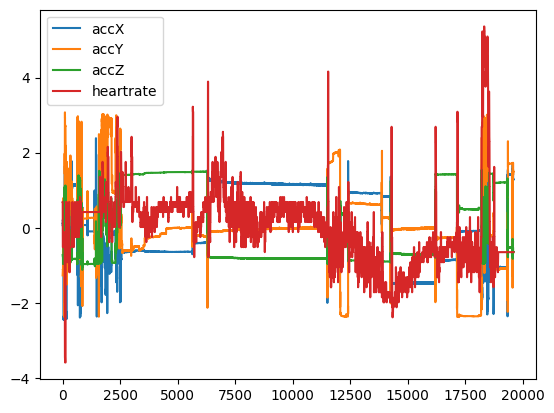

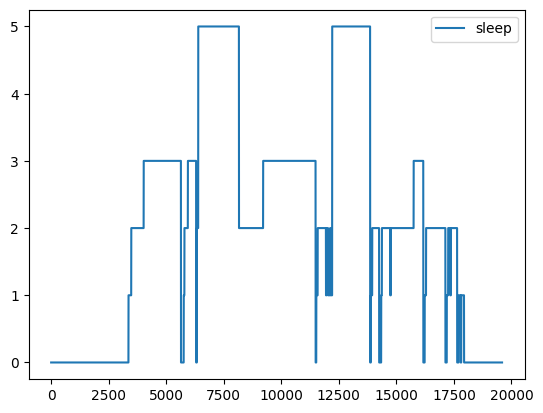

In [566]:
# Visualize signals
df_feature.plot(), df_label.plot()
plt.show()

### SMA and Create 2D Feature

In [567]:
# ------------Simple Moving Average (SMA) ------------------------------
df_feature_SMA= pd.DataFrame(columns=['accX', 'accY', 'accZ', 'heartrate'])
df_feature_SMA['accX'] = df_feature['accX'].rolling(5, min_periods=1).mean()
df_feature_SMA['accY'] = df_feature['accY'].rolling(5, min_periods=1).mean()
df_feature_SMA['accZ'] = df_feature['accZ'].rolling(5, min_periods=1).mean()
df_feature_SMA['heartrate'] = df_feature['heartrate'].rolling(5, min_periods=1).mean()

In [568]:
# ------------ Train-Test-Split 2D features -------------------------------
# set sliding window parameter
# slidingW = 100 #จ ํานวน row
# Stride_step = 5
slidingW = 100
Stride_step = 5
n_features = 4 #number of colums form df_feature
df_feature2D = np.array([],ndmin=1)
df_label_new = np.array([])
df_feature2D_T = np.array([])
for t in range(0 , len(df_feature), Stride_step ):
    F2d = np.array(df_feature[t:t+slidingW],ndmin=1)
    if len(F2d) <slidingW:
        break
    # F2d.reshape(slidingW, n_features,1)
    F2d_T = F2d.transpose()
    # print(df_feature3D.shape)
    # print(F3d.shape)
    if df_feature2D.size == 0 :
        df_feature2D = F2d
        df_feature2D_T =F2d_T
    else:
        df_feature2D = np.dstack((df_feature2D,F2d))
        df_feature2D_T = np.dstack((df_feature2D_T,F2d_T))
    Labels = stats.mode(df_label[t : t+slidingW])
    # print(Labels)
    df_label_new = np.append(df_label_new,Labels[0])

# for t in range( 0 , len(df_feature), Stride_step ):
#     F2d= np.array(df_feature[t:t+slidingW],ndmin=1)
#     df_feature2D = np.append(df_feature2D,F2d)
#     F2d_T = np.transpose(F2d)
#     df_feature2D_T = np.append(df_feature2D_T,F2d_T)
#     Labels = stats.mode(df_label[t : t+slidingW])
#     df_label_new = np.append(df_label_new,Labels)

# df_feature2D = np.transpose(df_feature2D)
# df_feature2D = np.argmax(df_feature2D, axis=0)
# df_feature2D = np.swapaxes(df_feature2D,0,2)
# df_feature2D = np.swapaxes(df_feature2D,0,1)
# df_feature2D = np.transpose(df_feature2D)
df_feature2D = df_feature2D.transpose()
df_feature2D = df_feature2D[..., np.newaxis]
# df_feature2D_T = np.swapaxes(df_feature2D_T,0,1)
df_feature2D_T = df_feature2D_T.transpose()
df_feature2D_T = df_feature2D_T[..., np.newaxis]
# df_label_new = df_label_new.transpose()

print(df_feature2D.shape)
print(df_feature2D_T.shape)
print(df_label_new.shape)

C:\Users\ROG\AppData\Local\Temp\ipykernel_17320\1959526994.py:25: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Labels = stats.mode(df_label[t : t+slidingW])


(3899, 4, 100, 1)
(3899, 100, 4, 1)
(3899,)


In [569]:
Labels

ModeResult(mode=array([[0.]]), count=array([[100]]))

### Train Test Split

In [570]:
# ------------ Train-Test-Split 2D features -------------------------------
seed = 339
X_train_1, X_test_1, Y_train_1, Y_test_1 = model_selection.train_test_split(df_feature2D,df_label_new,test_size = 0.3, random_state=seed)

In [571]:
# ------------ Train-Test-Split 2D features -------------------------------
seed = 339
X_train_2, X_test_2, Y_train_2, Y_test_2 = model_selection.train_test_split(df_feature2D_T,df_label_new,test_size = 0.3, random_state=seed)

## LSTM Model Training and Testing

In [572]:
# ------------ LSTM Architecture parameter -------------------------------
LSTM_L1 = 100 # try 200, 300, 400, 500, 1000
LSTM_L2 = 50 # try 50, 100, 150, 200, 250, 300
dropRate_L1 = 0.25
dropRate_L2 = 0.5
D_out = 5
Activation = "softmax"
n_classes = 6
Input_shape1 = (n_features, slidingW)
Input_shape2 = (slidingW, n_features)
# Nlayer(LSTM_L1, Dense), Nnode, Activation

# try
#Option #1:
inRow = n_features
inCol = slidingW
# Option #2
inRow = slidingW
inCol = slidingW

In [573]:
# ------------ Create LSTM Model -------------------------------
model =  tf.keras.Sequential()
model.add( LSTM( LSTM_L1, return_sequences=True,
input_shape=Input_shape1))
model.add(Dropout(dropRate_L1 ))
model.add(LSTM(LSTM_L2))
model.add(Dropout(dropRate_L2))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 4, 100)            80400     
                                                                 
 dropout_40 (Dropout)        (None, 4, 100)            0         
                                                                 
 lstm_41 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_41 (Dropout)        (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 6)                 306       
                                                                 
Total params: 110,906
Trainable params: 110,906
Non-trainable params: 0
_________________________________________________________________


In [574]:
# ------------ Create LSTM Model -------------------------------
model2 =  tf.keras.Sequential()
model2.add( LSTM( LSTM_L1, return_sequences=True,
input_shape=Input_shape2))
model2.add(Dropout(dropRate_L1 ))
model2.add(LSTM(LSTM_L2))
model2.add(Dropout(dropRate_L2))
model2.add(Dense(n_classes, activation='softmax'))
model2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 100, 100)          42000     
                                                                 
 dropout_42 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_43 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_43 (Dropout)        (None, 50)                0         
                                                                 
 dense_21 (Dense)            (None, 6)                 306       
                                                                 
Total params: 72,506
Trainable params: 72,506
Non-trainable params: 0
_________________________________________________________________


In [575]:
# ------------ Create Optimizer -------------------------------
model.compile(optimizer='adam',
loss= "sparse_categorical_crossentropy",metrics=["acc"])

In [576]:
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(2729, 4, 100, 1)
(1170, 4, 100, 1)
(2729,)
(1170,)


In [577]:
# ------ Train CNN using 2D feature--------------------------------------------
# Training the model
EP = 50
batch_size = 100 # try 20, 40, 60, 80, 100
history = model.fit( X_train_1, Y_train_1, # try Option #1 และ Option #2
batch_size = batch_size,
validation_data=(X_test_1, Y_test_1), epochs=EP)

Epoch 1/50
28/28 [==============================] - 4s 38ms/step - loss: 1.4770 - acc: 0.4122 - val_loss: 1.2664 - val_acc: 0.4761
Epoch 2/50
28/28 [==============================] - 0s 12ms/step - loss: 1.1940 - acc: 0.5013 - val_loss: 1.0644 - val_acc: 0.5222
Epoch 3/50
28/28 [==============================] - 0s 11ms/step - loss: 0.9743 - acc: 0.6244 - val_loss: 0.8279 - val_acc: 0.6949
Epoch 4/50
28/28 [==============================] - 0s 11ms/step - loss: 0.7885 - acc: 0.7123 - val_loss: 0.7013 - val_acc: 0.7436
Epoch 5/50
28/28 [==============================] - 0s 11ms/step - loss: 0.6980 - acc: 0.7369 - val_loss: 0.6436 - val_acc: 0.7496
Epoch 6/50
28/28 [==============================] - 0s 11ms/step - loss: 0.6429 - acc: 0.7604 - val_loss: 0.6316 - val_acc: 0.7487
Epoch 7/50
28/28 [==============================] - 0s 11ms/step - loss: 0.5986 - acc: 0.7739 - val_loss: 0.5682 - val_acc: 0.7632
Epoch 8/50
28/28 [==============================] - 0s 11ms/step - loss: 0.5339 - a

In [578]:
print(X_train_2.shape)
print(X_test_2.shape)
print(Y_train_2.shape)
print(Y_test_2.shape)

(2729, 100, 4, 1)
(1170, 100, 4, 1)
(2729,)
(1170,)


In [579]:
# ------------ Create Optimizer -------------------------------
model2.compile(optimizer='adam',
loss= "sparse_categorical_crossentropy",metrics=["acc"])

In [580]:
# ------ Train CNN using 2D feature--------------------------------------------
# Training the model
EP = 50
batch_size = 10 # try 20, 40, 60, 80, 100
history2 = model2.fit( X_train_2, Y_train_2, # try Option #1 และ Option #2
batch_size = batch_size,
validation_data=(X_test_2, Y_test_2), epochs=EP)

Epoch 1/50
273/273 [==============================] - 19s 59ms/step - loss: 1.0904 - acc: 0.5529 - val_loss: 0.8633 - val_acc: 0.6231
Epoch 2/50
273/273 [==============================] - 22s 79ms/step - loss: 0.8098 - acc: 0.6673 - val_loss: 0.6984 - val_acc: 0.7188
Epoch 3/50
273/273 [==============================] - 21s 76ms/step - loss: 0.7145 - acc: 0.7116 - val_loss: 0.6071 - val_acc: 0.7521
Epoch 4/50
273/273 [==============================] - 21s 78ms/step - loss: 0.6112 - acc: 0.7552 - val_loss: 0.5233 - val_acc: 0.7718
Epoch 5/50
273/273 [==============================] - 21s 77ms/step - loss: 0.6874 - acc: 0.7109 - val_loss: 0.6268 - val_acc: 0.7325
Epoch 6/50
273/273 [==============================] - 22s 81ms/step - loss: 0.6673 - acc: 0.7274 - val_loss: 0.6128 - val_acc: 0.7410
Epoch 7/50
273/273 [==============================] - 25s 90ms/step - loss: 0.6100 - acc: 0.7574 - val_loss: 0.6140 - val_acc: 0.7590
Epoch 8/50
273/273 [==============================] - 28s 101m

In [581]:
#LSTM prediction for Option #1 and Option #2
LSTM_pred = model.predict(X_test_1)
# Get classID from max prob(LSTM_pred)
# df_pred = pd.DataFrame(LSTM_pred)
# df_class => use dataframe -> idxmax(axis=1)

37/37 [==============================] - 1s 4ms/step


In [582]:
# ------------ View Confusion Matrix, Classification Report -------------------------------
from sklearn import utils
print(utils.multiclass.type_of_target(LSTM_pred))

continuous-multioutput


In [586]:
LSTM_pred1 = np.argmax(model.predict(X_test_1),axis=1)
LSTM_pred2 = np.argmax(model2.predict(X_test_2),axis=1)
print(utils.multiclass.type_of_target(LSTM_pred1))
print(utils.multiclass.type_of_target(LSTM_pred2))

37/37 [==============================] - 2s 40ms/step
multiclass
multiclass


In [594]:
######## Option 1
# ------------ View Confusion Matrix, Classification Report -------------------------------
print('Confusion Matrix of LSTM 1 model: ')
print(confusion_matrix(Y_test_1,LSTM_pred1))
print('Classification Report of LSTM 1 model: ')
print(classification_report(Y_test_1,LSTM_pred1))

Confusion Matrix of LSTM 1 model: 
[[288   2  12   0   4]
 [  3  37  20   0   1]
 [  1   0 272  15  12]
 [  1   0   7 291   0]
 [  2   0   0   0 202]]
Classification Report of LSTM 1 model: 
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       306
         1.0       0.95      0.61      0.74        61
         2.0       0.87      0.91      0.89       300
         3.0       0.95      0.97      0.96       299
         5.0       0.92      0.99      0.96       204

    accuracy                           0.93      1170
   macro avg       0.93      0.88      0.90      1170
weighted avg       0.93      0.93      0.93      1170



In [595]:
######## Option 2
# ------------ View Confusion Matrix, Classification Report -------------------------------
print('Confusion Matrix of LSTM 2 model: ')
print(confusion_matrix(Y_test_2,LSTM_pred2))
print('Classification Report of LSTM 2 model: ')
print(classification_report(Y_test_2,LSTM_pred2))

Confusion Matrix of LSTM 2 model: 
[[275  17   9   0   5]
 [  9  44   8   0   0]
 [ 16  19 232  31   2]
 [  1   0  30 268   0]
 [  0   1   1   0 202]]
Classification Report of LSTM 2 model: 
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       306
         1.0       0.54      0.72      0.62        61
         2.0       0.83      0.77      0.80       300
         3.0       0.90      0.90      0.90       299
         5.0       0.97      0.99      0.98       204

    accuracy                           0.87      1170
   macro avg       0.83      0.86      0.84      1170
weighted avg       0.88      0.87      0.87      1170



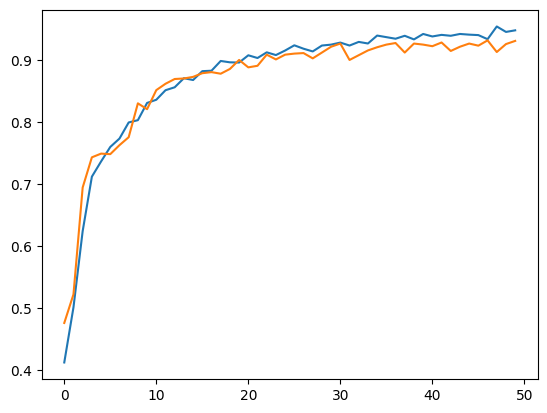

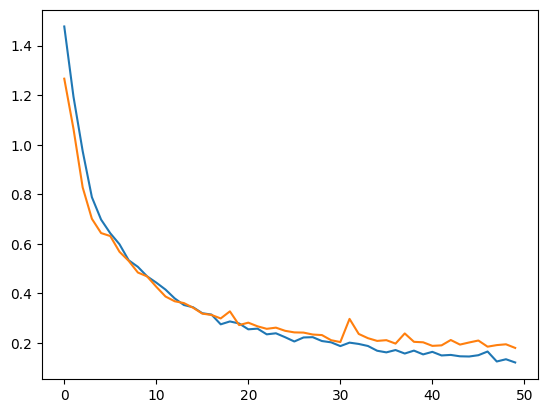

In [596]:
######## Option 1
# ------ View History Graph -------------------------------------------
# View Accuracy Graph
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()
# View Loss Graph
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

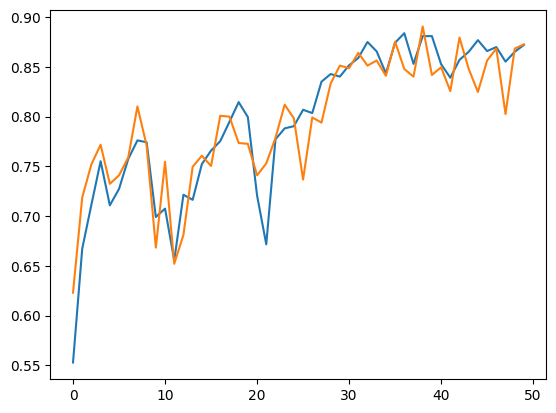

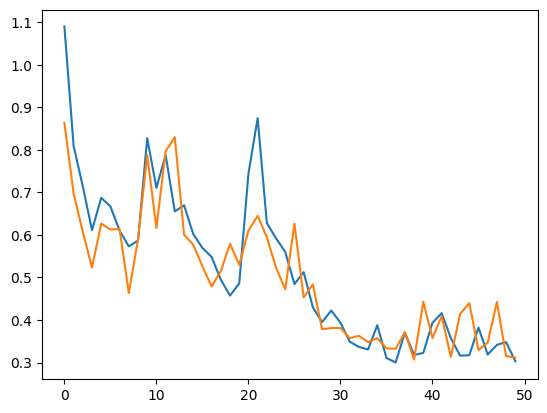

In [597]:
######## Option 2
# ------ View History Graph -------------------------------------------
# View Accuracy Graph
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.show()
# View Loss Graph
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()